In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
df=pd.read_csv('F:/New folder (2)/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.iloc[np.where(df['Age'].isnull()==True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [5]:
df.drop(columns=['PassengerId','Name'],inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
a=df.groupby('Ticket')['Cabin'].value_counts()



In [8]:
a

Ticket             Cabin
110152             B77      2
                   B79      1
110413             E67      2
                   E68      1
110465             A14      1
                           ..
SC/AH Basle 541    D        1
SC/Paris 2163      D        1
SOTON/O.Q. 392078  E10      1
W.E.P. 5734        E31      1
WE/P 5735          B22      2
Name: Cabin, Length: 161, dtype: int64

In [9]:
df.drop(columns=['Ticket'],inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

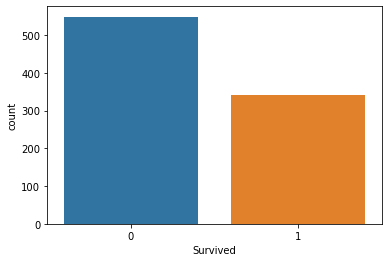

In [12]:
sns.countplot(df['Survived'])

In [13]:
df['Cabin'].fillna(method='ffill',axis=0)

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [14]:
cabin=df['Cabin'].astype(str)
c_cabin=[c[0] for c in cabin]
Cabin_new=pd.Categorical(c_cabin)
df['new_cabin']=Cabin_new
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,new_cabin
0,0,3,male,22.0,1,0,7.2500,NaN,S,n
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,n
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,n


In [15]:
df.drop(columns=['Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_cabin
0,0,3,male,22.0,1,0,7.2500,S,n
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,n
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,n


In [16]:
df.isnull().sum(axis=0)

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
new_cabin      0
dtype: int64

In [17]:
mean_age=round(df['Age'].mean(),0)
mean_age

30.0

In [18]:
df['Age'].fillna(value=mean_age,inplace=True)

In [19]:
df.isnull().sum(axis=0)

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     2
new_cabin    0
dtype: int64

In [20]:
df.shape

(891, 9)

In [21]:
dummy_sex=pd.get_dummies(df['Sex'],drop_first=True,prefix='Sex_')
dummy_sex

,Sex__male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
dummy_embarked=pd.get_dummies(df['Embarked'],drop_first=True,prefix='Embarked_')
dummy_embarked

,Embarked__Q,Embarked__S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
df['new_cabin'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: new_cabin, dtype: int64

In [25]:
dummy_cabin=pd.get_dummies(df['new_cabin'],drop_first=True,prefix='new_cabin_')
dummy_cabin

,new_cabin__B,new_cabin__C,new_cabin__D,new_cabin__E,new_cabin__F,new_cabin__G,new_cabin__T,new_cabin__n
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,1
887,1,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,1
889,0,1,0,0,0,0,0,0


In [26]:
df=pd.concat([df,dummy_sex,dummy_embarked,dummy_cabin],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_cabin,Sex__male,Embarked__Q,Embarked__S,new_cabin__B,new_cabin__C,new_cabin__D,new_cabin__E,new_cabin__F,new_cabin__G,new_cabin__T,new_cabin__n
0,0,3,male,22.0,1,0,7.2500,S,n,1,0,1,0,0,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,0,0,0,0,1,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,n,0,0,1,0,0,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,C,0,0,1,0,1,0,0,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,n,1,0,1,0,0,0,0,0,0,0,1


In [27]:
df.drop(columns=['Sex','Embarked','new_cabin'],inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S,new_cabin__B,new_cabin__C,new_cabin__D,new_cabin__E,new_cabin__F,new_cabin__G,new_cabin__T,new_cabin__n
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1


In [28]:
X=df.drop(columns='Survived')
y=df['Survived']

In [29]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked__Q,Embarked__S,new_cabin__B,new_cabin__C,new_cabin__D,new_cabin__E,new_cabin__F,new_cabin__G,new_cabin__T,new_cabin__n
0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,0,0,1,1,0,0,0,0,0,0,0
888,3,30.0,1,2,23.4500,0,0,1,0,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,0,0,0,0


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
clf.score(X_train,y_train)

0.9831460674157303

In [34]:
clf.score(X_test,y_test)

0.8044692737430168

In [48]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,36,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [49]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =2,verbose=3)

In [50]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9792 candidates, totalling 48960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 380 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 3452 tasks      | elapsed:   11.3s
[Parallel(n_jobs=2)]: Done 8572 tasks      | elapsed:   30.4s
[Parallel(n_jobs=2)]: Done 15740 tasks      | elapsed:   52.5s
[Parallel(n_jobs=2)]: Done 24956 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 36220 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 48960 out of 48960 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=6,
                                              min_samples_split=14,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='random'),
             iid='deprecated', n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [51]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 28,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'splitter': 'random'}

In [45]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=6,min_samples_split=14,splitter='random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [46]:
clf.score(X_train,y_train)

0.8426966292134831

In [47]:
clf.score(X_test,y_test)

0.7653631284916201

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
cm=confusion_matrix(y_test,clf.predict(X_test))
cm

array([[87, 18],
       [21, 53]], dtype=int64)

In [44]:
cr=classification_report(y_test,clf.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

